In [7]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

# Clustering Coefficient

Triadic closure: the tendency for people who share connections in a social network to become connected.

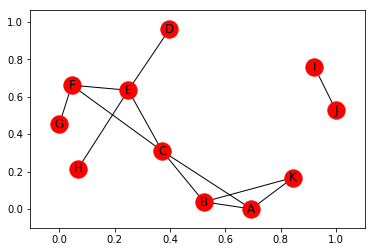

In [40]:
G=nx.Graph()
G.add_edges_from([('A','B'),('A','K'),('A','C'),('B','C'),('B','K'),
                  ('C','E'),('C','F'),('E','F'),('D','E'),('E','H'),('I','J'),('G','F')])
nx.draw_networkx(G)
plt.show()

Local clustering coefficient of a node: Fraction of pairs of the node's friends that are friends each other.

In [41]:
nx.clustering(G,'F')

0.3333333333333333

Global Clustering Coefficient

Approach 1

In [42]:
nx.average_clustering(G)

0.28787878787878785

Approach 2  
Percentage of "open triads" that are triangles in a network  
Transitivity: Ratio of number of triangles and number of "open triads" in a network.  
$$Transitivity=\frac{3*Number of closed triads}{Number of open triads}$$

In [43]:
nx.transitivity(G)

0.4090909090909091

# Distance Measures

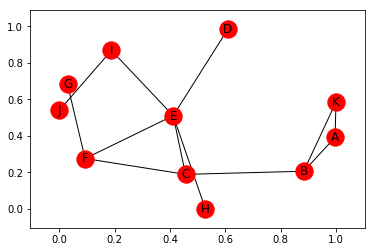

In [23]:
G=nx.Graph()
G.add_edges_from([('A','B'),('A','K'),('B','C'),('B','K'),('C','E'),('C','F'),('E','F'),('D','E'),('E','I'),('E','H'),('I','J'),('G','F')])
nx.draw_networkx(G)
plt.show()

In [24]:
nx.shortest_path(G,'A','H')

['A', 'B', 'C', 'E', 'H']

In [25]:
nx.shortest_path_length(G,'A','H')

4

In [27]:
nx.average_shortest_path_length(G)

2.5272727272727273

Diameter: maxium distance between any pair of nodes

In [28]:
nx.diameter(G)

5

Eccentricity: the largest distance between n and other nodes

In [30]:
nx.eccentricity(G)

{'A': 5,
 'B': 4,
 'C': 3,
 'D': 4,
 'E': 3,
 'F': 3,
 'G': 4,
 'H': 4,
 'I': 4,
 'J': 5,
 'K': 5}

Radius: the minimum eccentricity

In [32]:
nx.radius(G)

3

Periphery: the set of nodes that have eccentricity equal to the diameter

In [33]:
nx.periphery(G)

['A', 'K', 'J']

Center: the set of nodes that have eccentricity equal to the radius

In [34]:
nx.center(G)

['C', 'E', 'F']

Breadth-First Search

In [26]:
T=nx.bfs_tree(G,'A')
T.edges()

[('A', 'B'),
 ('A', 'K'),
 ('B', 'C'),
 ('C', 'E'),
 ('C', 'F'),
 ('E', 'D'),
 ('E', 'I'),
 ('E', 'H'),
 ('F', 'G'),
 ('I', 'J')]

## Karate Club Network

In [35]:
G1=nx.karate_club_graph()
G1=nx.convert_node_labels_to_integers(G1,first_label=1)


In [38]:
nx.center(G1)

[1, 2, 3, 4, 9, 14, 20, 32]

In [44]:
nx.periphery(G1)

[17, 15, 16, 19, 21, 23, 24, 30, 27]

# Connected Components

Connected Graghs: there is a path between every pair nodes in the undirected graph.

In [114]:
nx.is_connected(G_un)

True

Connected Component:   
1, Every node in the subset has a path to every other node.  
2, No other node has a path to any node in the subset.

In [115]:
nx.number_connected_components(G_un)

1

In [116]:
sorted(nx.connected_components(G_un))

[{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O'}]

In [117]:
nx.node_connected_component(G_un,'A')

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O'}

Connectivity in Directed Graphs  
Strongly connected: there are directed paths from each other for pair nodes   
Weakly connected: replacing all directed edges with undirected edges produces a connected undirected graph.

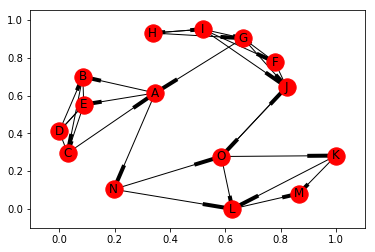

In [98]:
G=nx.DiGraph()
G.add_edges_from([('A','B'),('A','E'),('A','N'),('B','C'),('B','E'),('C','A'),('C','D'),('D','E'),('D','B'),
                ('E','D'),('E','C'),('F','G'),('G','A'),('G','J'),('H','G'),('H','I'),('I','H'),('I','J'),
                ('I','G'),('I','F'),('I','J'),('J','F'),('J','O'),('K','L'),('K','M'),('L','M'),
                ('N','O'),('N','L'),('O','K'),('O','L'),('O','J')])
nx.draw_networkx(G)
plt.show()

In [96]:
nx.is_strongly_connected(G)

False

In [86]:
nx.is_weakly_connected(G)

True

Strongly connected component:  
1, Every node in the subset has a directed path to every other node.  
2, No other node has a directed path to and from every node in the subset.

In [87]:
sorted(nx.strongly_connected_components(G))

[{'M'},
 {'L'},
 {'K'},
 {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'J', 'N', 'O'},
 {'H', 'I'}]

Weakly connected component: the connected components of the graph after replacing all directed edges with undirected edges.

In [88]:
sorted(nx.weakly_connected_components(G))

[{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O'}]

# Network Robustness

The ability of a network to maintain its general structural properties when it faces failures or attacks.  
attackes: removal of nodes or edges  
structural properties: connectivity

The smallest number of nodes that can be removed from this graph in order to disconnect it.

In [103]:
G_un=G.to_undirected()

In [104]:
nx.node_connectivity(G_un)

1

In [105]:
nx.minimum_node_cut(G_un)

{'A'}

The smallest number of edges that can be removed from this graph in order to disconnect it.

In [106]:
nx.edge_connectivity(G_un)

2

In [107]:
nx.minimum_edge_cut(G_un)

{('H', 'G'), ('H', 'I')}

Robust networks have large minimum node and edge cuts.

Simple paths: all paths between teo nodes

In [108]:
sorted(nx.all_simple_paths(G,'G','L'))

[['G', 'A', 'N', 'L'],
 ['G', 'A', 'N', 'O', 'K', 'L'],
 ['G', 'A', 'N', 'O', 'L'],
 ['G', 'J', 'O', 'K', 'L'],
 ['G', 'J', 'O', 'L']]

Block the message from G to L by removing nodes from the network, how many nodes woulf we need to move?

In [109]:
nx.node_connectivity(G,'G','L')

2

In [110]:
nx.minimum_node_cut(G,'G','L')

{'N', 'O'}

In [111]:
nx.edge_connectivity(G,'G','L')

2

In [112]:
nx.minimum_edge_cut(G,'G','L')

{('A', 'N'), ('J', 'O')}